In [121]:
# Fisrt we are try to understand Titanic Dataset

# Titanic Dataset Columns Explained
# PassengerId
# A unique identifier for each passenger.
# Example: 1, 2, 3, ...

# Survived
# Indicates if the passenger survived the sinking of the Titanic.

# 0 = Did not survive

# 1 = Survived

# Pclass
# Passenger class, which is a proxy for socio-economic status:

# 1 = 1st class (upper)

# 2 = 2nd class (middle)

# 3 = 3rd class (lower)

# Name
# Full name of the passenger, sometimes including titles (Mr., Mrs., Miss, etc.).

# Sex
# Gender of the passenger. Usually "male" or "female".

# Age
# Age of the passenger in years. Some values may be missing.

# SibSp
# Number of siblings or spouses aboard the Titanic with the passenger.

# Parch
# Number of parents or children aboard the Titanic with the passenger.

# Ticket
# Ticket number of the passenger’s booking. Can be numeric or alphanumeric.

# Fare
# Amount of money the passenger paid for the ticket.

# Cabin
# Cabin number where the passenger stayed. Often missing and can include letters and numbers.

# Embarked
# Port where the passenger boarded the Titanic:

# C = Cherbourg

# Q = Queenstown

# S = Southampton

In [122]:
# 1.Import the dataset and explore basic info (nulls, data types).

In [123]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [124]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [125]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [126]:
# 2.Handle missing values using mean/median/imputation.

In [127]:
# See the main difference between mean median
# Mean = (10 + 20 + 30  + 1000) / 4 = 265
# Median = (10, 20, 30, 1000 → Median = (20 + 30) / 2 = 25

In [128]:
# Before fill missing value
print(df['Age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [129]:
# 1. Fill missing Age with the median age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [130]:
print(df['Age'].head(10))

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


In [131]:
# Before fill missing value
print(df['Embarked'][60:65])

60      C
61    NaN
62      S
63      S
64      C
Name: Embarked, dtype: object


In [132]:
# 2. Fill missing Embarked with the most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [133]:
print(df['Embarked'][60:65])

60    C
61    S
62    S
63    S
64    C
Name: Embarked, dtype: object


In [134]:
# Drop the 'Cabin' column (because it's mostly empty)
df = df.drop('Cabin', axis=1)
print("Missing values after cleaning:\n")
df.isnull().sum()

Missing values after cleaning:



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [135]:
# 3.Convert categorical features into numerical using encoding.

In [136]:
# Now we use Label Encoding for 'Sex' (male = 1, female = 0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [137]:
# 2. One-Hot Encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [138]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [139]:
# 4.Normalize/standardize the numerical features.

In [140]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# now we choose the column to scale (only numeric)
numeric_cols = ['Age', 'Fare']

#  Fit and transform the selected columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df[numeric_cols].head())

        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


In [141]:
# Visualize outliers using boxplots and remove them.

In [142]:
# First Visualize the outlier

In [143]:
print("Data shape after removing outliers:", df.shape)

Data shape after removing outliers: (891, 12)


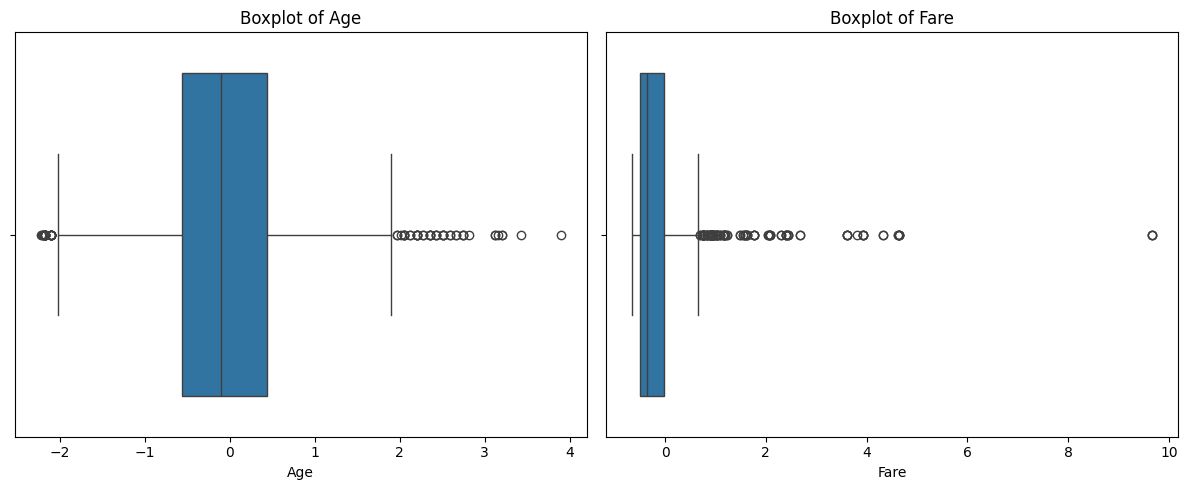

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for Age and Fare
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")

plt.tight_layout()
plt.show()

In [145]:
# Now remove the outlier using IQR and plot

Data shape after removing outliers: (718, 12)


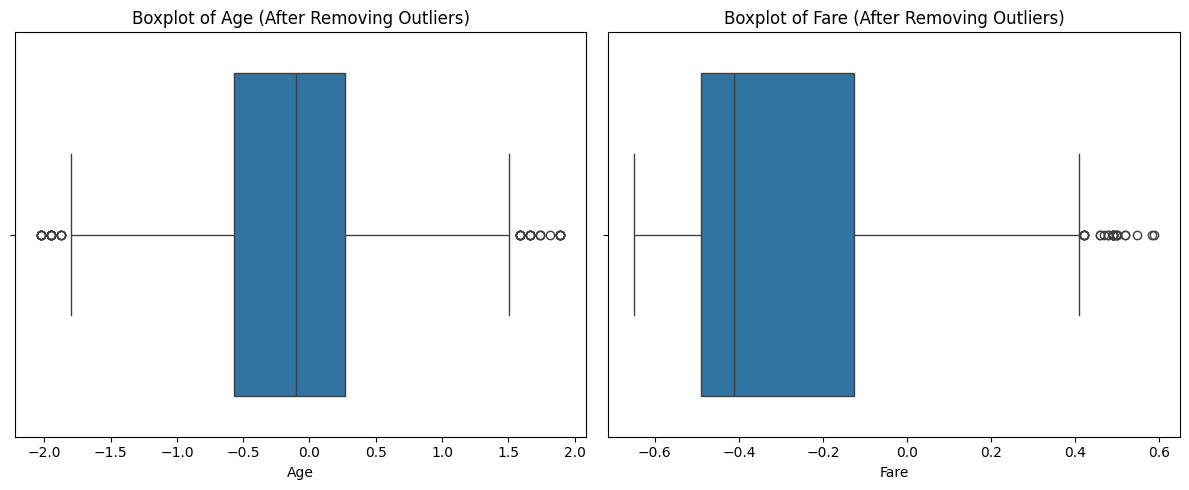

In [146]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Interquartile Range
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers from Age and Fare
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

# Check the shape of the data after removing
print("Data shape after removing outliers:", df.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (After Removing Outliers)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare (After Removing Outliers)")

plt.tight_layout()
plt.show()